In [1]:
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm, kde, kstest
from numpy import inf
import math




%matplotlib inline
sns.set()
pd.set_option('display.max_rows', 2000)
pd.set_option('display.width', 1000)
data_path = "C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Gmail_df.csv"
data0 = pd.read_csv(data_path)
data_path_write = 'C:\\Users\\augus\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\'

In [2]:
data = data0[['time','inbound_non_spam_emails']]

In [3]:
data.head()

,time,inbound_non_spam_emails
0,2015-03-23 00:00:00-04:00,177446.0
1,2015-03-24 00:00:00-04:00,163005.0
2,2015-03-25 00:00:00-04:00,155603.0
3,2015-03-26 00:00:00-04:00,158907.0
4,2015-03-27 00:00:00-04:00,137505.0


In [4]:
data.describe()

,inbound_non_spam_emails
count,1585.000000
mean,162277.896966
std,55305.978523
min,50814.000000
25%,116627.000000
50%,162912.000000
75%,201992.000000
max,442820.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000148DE5B45C0>]],
      dtype=object)

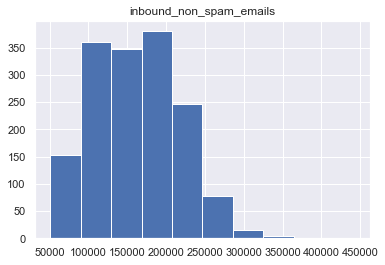

In [5]:
data.hist()

In [6]:
#data = data[(data.T != 0.0).any()]
#data = data[data['emails_sent'] != 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000148DE5B48D0>]],
      dtype=object)

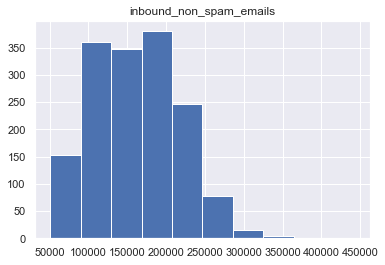

In [7]:
data.hist()

In [8]:
data.describe()

,inbound_non_spam_emails
count,1585.000000
mean,162277.896966
std,55305.978523
min,50814.000000
25%,116627.000000
50%,162912.000000
75%,201992.000000
max,442820.000000


In [9]:
data['time'] = pd.to_datetime(data['time'],utc=True)
data.set_index('time', inplace=True)


C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Year')

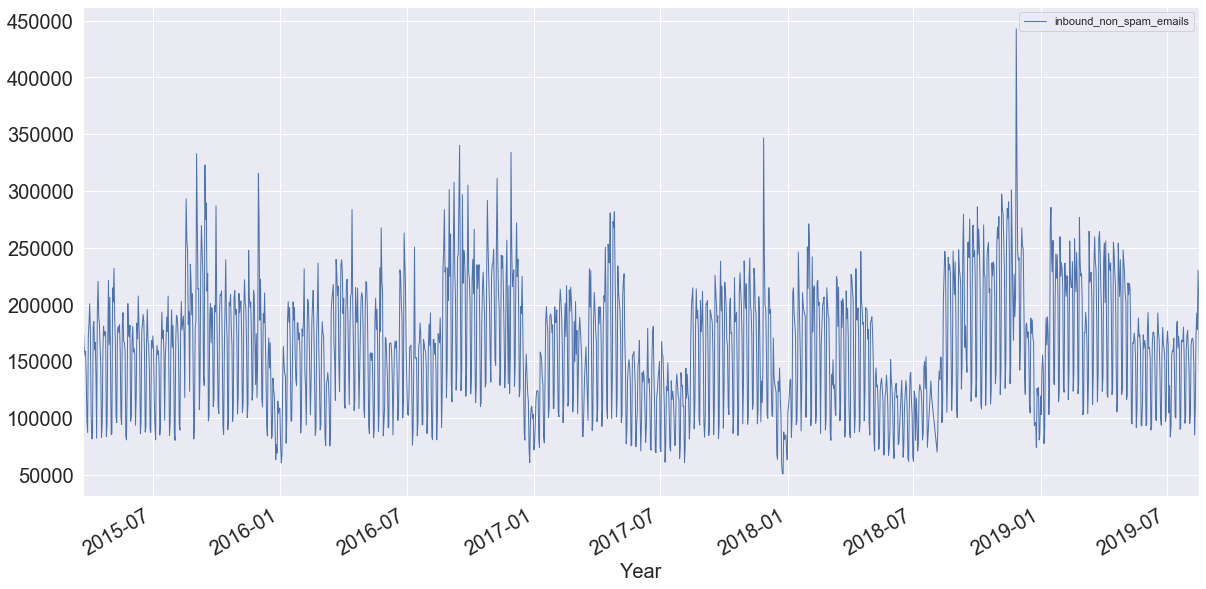

In [10]:
data.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

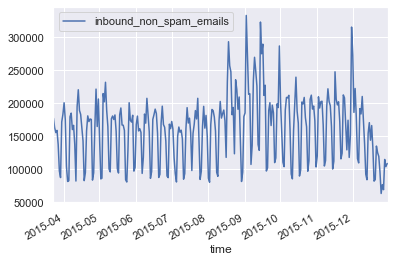

In [11]:
data.loc['2015'].plot()

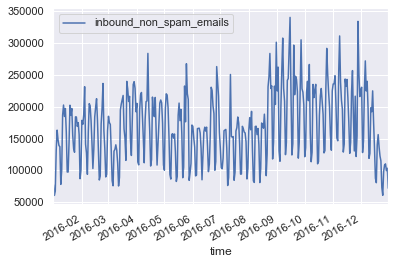

In [12]:
data.loc['2016'].plot()

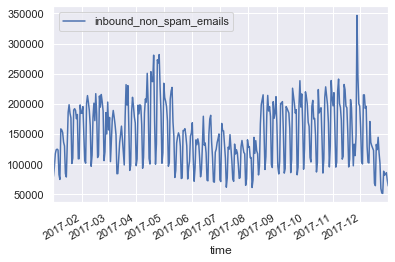

In [13]:
data.loc['2017'].plot()

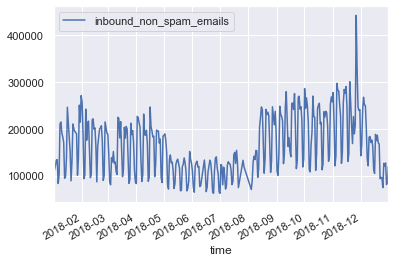

In [14]:
data.loc['2018'].plot()

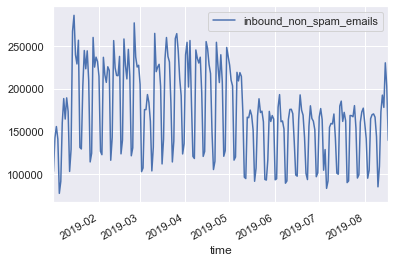

In [15]:
data.loc['2019'].plot()

In [16]:
#alpha = norm.fit(data['inbound_non_spam_emails'])[0]
#beta = norm.fit(data['inbound_non_spam_emails'])[1]

In [17]:
one = data['inbound_non_spam_emails']

In [18]:
density = kde.gaussian_kde(one, bw_method=None)

C:\Users\Henry\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2477: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


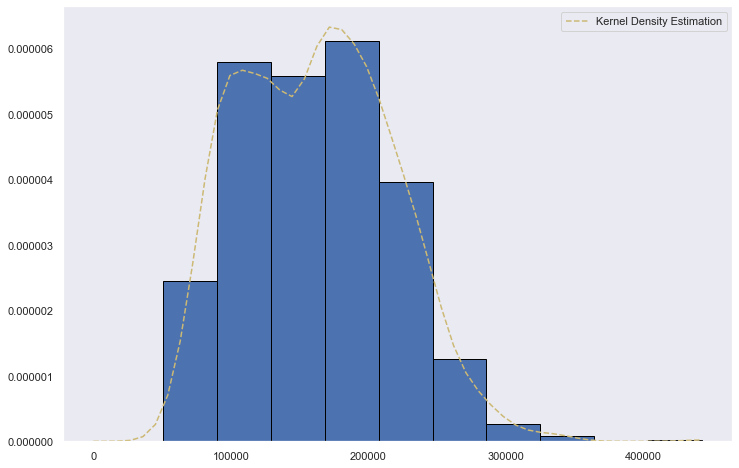

In [19]:
import numpy as np
one.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, one.max())
xgrid = np.linspace(x.min(), x.max(), 100)

#l1, = plt.plot(x, norm.pdf(x, alpha[-1], beta[-1]), 'm-', label="Method Of Moments")
#l2, = plt.plot(x, norm.pdf(x, alpha, beta), 'r--', label="Maximum Likelihood Estimation")
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

In [20]:
>>> my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])


In [21]:
kstest(one,my_cdf)

KstestResult(statistic=0.018411529615585287, pvalue=0.655825234896639)

In [22]:
#e = norm(alpha,beta)

In [23]:
#kstest(one,e.cdf)

In [24]:
one_size = one.size
one_mean = one.mean()
z_critical = norm.ppf(q = 0.975)  # Get the z-critical value*
                        

one_std = one.std()  # Get the population standard deviation

margin_of_error = z_critical * (one_std/math.sqrt(one_size))

confidence_interval = (one_mean - margin_of_error,
                       one_mean + margin_of_error)  

print("Sample Mean:")
print(one_mean)

print("Confidence interval:")
print(confidence_interval)

Sample Mean:
162277.89696586598
Confidence interval:
(159555.16093594625, 165000.6329957857)
